In [ ]:

%matplotlib inline
import numpy as np
import networkx as nx
from networkx.algorithms import community #use community algorithm to detect communities within a graph
import itertools
import matplotlib.pyplot as plt

FileName="/content/drive/My Drive/email-Eu-core-temporal.txt"
Graphtype=nx.Graph()   # use net.DiGraph() for directed graph

# How to read from a file. Note: if your egde weights are int, change float to int.
G = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))


get_nodes = False
if get_nodes == True:
    # Find the total number of degree, in_degree and out_degree for each node
    for x in G.nodes():
          print ("Node: ", x, " has total #degree: ",G.degree(x), " , In_degree: ", G.out_degree(x)," and out_degree: ", G.in_degree(x))

get_edges = False
if get_edges == True:
    # Find the weight for each node
    for u,v in G.edges():
          print ("Weight of Edge ("+str(u)+","+str(v)+")", G.get_edge_data(u,v))



#print(sorted(nx.get_edge_attributes(G, 'weight')))




# print communities within the graph
get_communities = False
if get_communities == True:
    find_communities = community.girvan_newman(G)
    top_level_communities = next(find_communities)
    next_level_communities = next(find_communities)
    print(sorted(map(sorted, next_level_communities)))


#k = 42
#comp = community.girvan_newman(G)
#limited = itertools.takewhile(lambda c: len(c) <= k, comp)
#for communities in limited:
     #print(tuple(sorted(c) for c in communities))



c = list(community.k_clique_communities(G, 13))
print(c)

[frozenset({256, 2, 260, 517, 133, 648, 266, 782, 912, 790, 30, 416, 166, 294, 168, 425, 946, 435, 948, 949, 52, 439, 313, 699, 573, 61, 447, 586, 74, 332, 77, 974, 721, 214, 984, 472, 90, 602, 730, 607, 356, 868, 743, 232, 104, 111, 112, 500, 885, 759, 762, 765, 126}), frozenset({647, 136, 267, 142, 17, 915, 31, 543, 165, 806, 428, 302, 952, 953, 316, 838, 200, 971, 847, 344, 857, 92, 349, 990, 351, 224, 629}), frozenset({207, 656, 978, 851, 274, 469, 658, 280, 24, 795, 988, 547, 35, 421, 614, 167, 424, 552, 301, 817, 630, 954, 188, 957}), frozenset({704, 73, 458, 844, 723, 918, 216, 25, 672, 41, 684, 558, 48, 499, 565, 758, 956, 318, 319}), frozenset({0, 409, 538, 929, 178, 693, 569, 314, 710, 333, 78, 976, 470, 599, 605, 862, 991, 99, 228, 502, 249, 767}), frozenset({644, 516, 650, 13, 654, 783, 14, 657, 270, 532, 921, 923, 924, 541, 682, 173, 437, 828, 702, 576, 837, 199, 327, 719, 850, 979, 90, 738, 996, 1001, 745, 881, 761, 506, 381}), frozenset({838, 267, 526, 846, 530, 658, 280

In [ ]:
len(c)

10

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


14
15
18
19
22
24
27
35
53
116
281


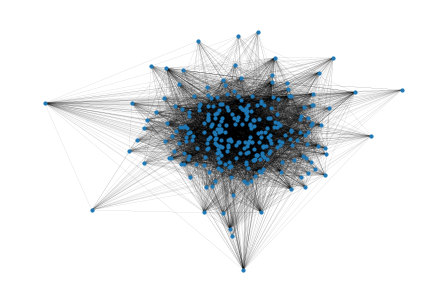

In [ ]:
for x in sorted(c,key=len):
    print(len(x))

K = nx.induced_subgraph(G, c[0].union(c[1]).union(c[2]).union(c[3]).union(c[4]).union(c[5]).union(c[6]).union(c[7]).union(c[8]).union(c[9]))
print(len(K.nodes()))
nx.draw_kamada_kawai(K, node_size = 10, arrowsize = 4, width = 0.05)
plt.draw()
#plt.show()
plt.savefig('K13.png', dpi=800)

In [ ]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [ ]:
d = c

number of communities: 10


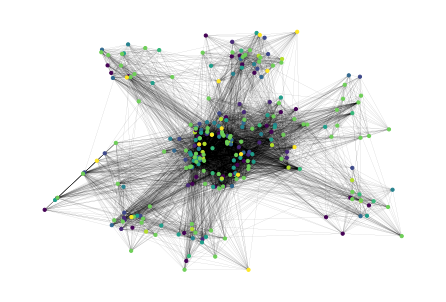

In [ ]:
index = 0
partition = {}
for x in d:
    for y in x:
        partition[y] = index
    index = index + 1

pos = community_layout(K, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(K, pos, node_color=list(partition.values()), node_size = 10, arrowsize = 4, width = 0.05)
plt.savefig('K13-2', dpi=800)

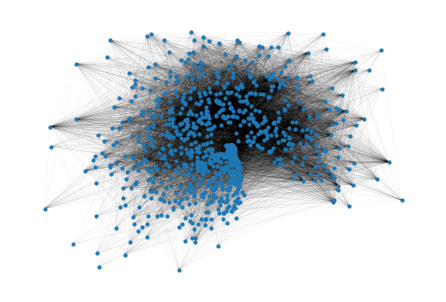

In [ ]:
nx.draw_kamada_kawai(G, node_size = 10, arrowsize = 4, width = 0.02)
plt.draw()
#plt.show()
plt.savefig('G.png', dpi=800)

number of communities: 8


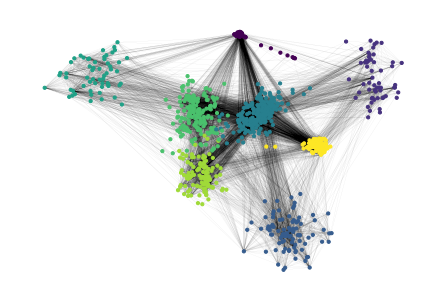

In [ ]:
from community import community_louvain
#import community

partition = community_louvain.best_partition(G)
pos = community_layout(G, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G, pos, node_color=list(partition.values()), node_size = 10, arrowsize = 4, width = 0.02)
plt.savefig('G5.png', dpi=1000)

In [ ]:
nx.info(G)

'Graph with 265214 nodes and 365570 edges'

In [ ]:
nx.info(K)

'Graph with 165 nodes and 3794 edges'